# Level 2

## Task 2 : Cuisine Combination

* Identify the most common combinations of cuisines in the dataset.
* Determine if certain cuisine combinations tend to have higher ratings

### Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
#loading the dataset .csv file from my google drive shared folder
url = "https://drive.google.com/uc?export=download&id=1dKZxapT3xLzOTOpy1LCyqctL8YEvzp4Y"
df = pd.read_csv(url)
#previewing first few rows of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Checking the total number of rows and columns
df.shape

(9551, 21)

In [4]:
#checking the overall structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
#dropping null values of the cuisines column
df.dropna(subset = "Cuisines" , inplace = True)

#checking its structure after removing null values
df.info()

#again checking the number or rows and columns
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

(9542, 21)

### Determining the count of each cuisines combination

In [6]:
cuisines_count = df["Cuisines"].value_counts(ascending = False)

#filtering only rows with multiple cuisines
cuisines_combo_count = cuisines_count[cuisines_count.index.str.contains(",")]

print(cuisines_combo_count)

Cuisines
North Indian, Chinese                 511
North Indian, Mughlai                 334
North Indian, Mughlai, Chinese        197
Bakery, Desserts                      170
Pizza, Fast Food                      131
                                     ... 
World Cuisine, Patisserie, Cafe         1
Burger, Izgara                          1
Desserts, B�_rek                        1
Restaurant Cafe, Turkish, Desserts      1
Restaurant Cafe, Desserts               1
Name: count, Length: 1731, dtype: int64


### Identifying the most common combinations of cuisines in the dataset

In [7]:
most_comman_cuisines_combo = cuisines_combo_count.head()
print("Most comman cuisines combinations are :\n\n", most_comman_cuisines_combo)

Most comman cuisines combinations are :

 Cuisines
North Indian, Chinese             511
North Indian, Mughlai             334
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Pizza, Fast Food                  131
Name: count, dtype: int64


### Visualizing using a Pie chart

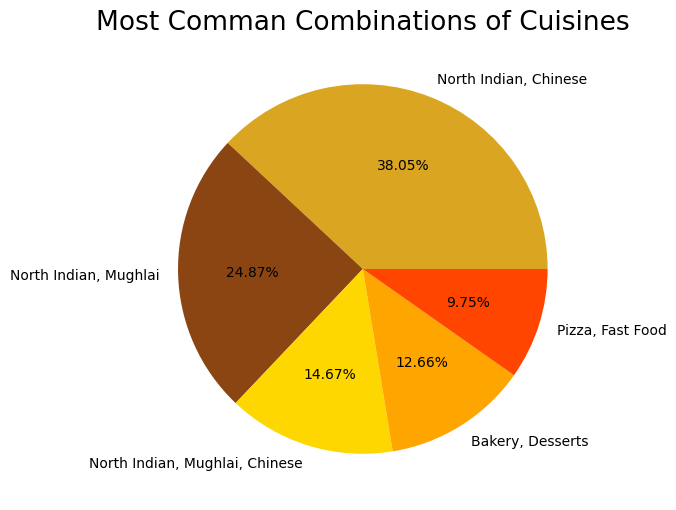

In [53]:
plt.figure(figsize = (8,6))
c = ["goldenrod","saddlebrown","gold","orange","orangered"]
plt.pie(most_comman_cuisines_combo.values , labels = most_comman_cuisines_combo.index , autopct = "%.2f%%" , colors = c )
plt.title("Most Comman Combinations of Cuisines" , fontsize = 19)
plt.show()

### Determining if certain cuisine combinations tend to have higher ratings

In [38]:
#finding the average rating of each cuisine combo
avg_ratings_by_combo = df.groupby(df["Cuisines"]).agg({"Aggregate rating":"mean"}).sort_values(by = "Aggregate rating" , ascending = False )
avg_ratings_by_combo = round(avg_ratings_by_combo[avg_ratings_by_combo.index.str.contains(",")],1)

#calculating mean of all cuisines combo
avg_ratings_mean = avg_ratings_by_combo["Aggregate rating"].mean()
print("Average ratings of Cuisines combination is : ", (round(avg_ratings_mean,1)))

#finding those cuisine combos that have higher average rating than the mean
higher_avg_ratings = (avg_ratings_by_combo[avg_ratings_by_combo["Aggregate rating"] > round(avg_ratings_mean,1)])

print("\nCuisines combinations that have higher average ratings are :\n ", higher_avg_ratings.sort_values(by = "Aggregate rating"))

Average ratings of Cuisines combination is :  3.4

Cuisines combinations that have higher average ratings are :
                                                   Aggregate rating
Cuisines                                                         
Cafe, Fast Food                                               3.5
Street Food, South Indian                                     3.5
Thai, Chinese                                                 3.5
Street Food, North Indian, South Indian, Mithai               3.5
American, Mexican                                             3.5
...                                                           ...
American, Coffee and Tea                                      4.9
Mexican, American, Healthy Food                               4.9
American, Caribbean, Seafood                                  4.9
American, Burger, Grill                                       4.9
Burger, Bar Food, Steak                                       4.9

[1103 rows x 1 columns]
